In [ ]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded  = files.upload()

Saving amazon_reviews_sample.csv to amazon_reviews_sample.csv


In [ ]:

df = pd.read_csv('amazon_reviews_sample.csv')
df.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   score       10000 non-null  int64 
 2   review      10000 non-null  object
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
df["score"].value_counts(normalize = True)

,proportion
score,
0,0.5097
1,0.4903


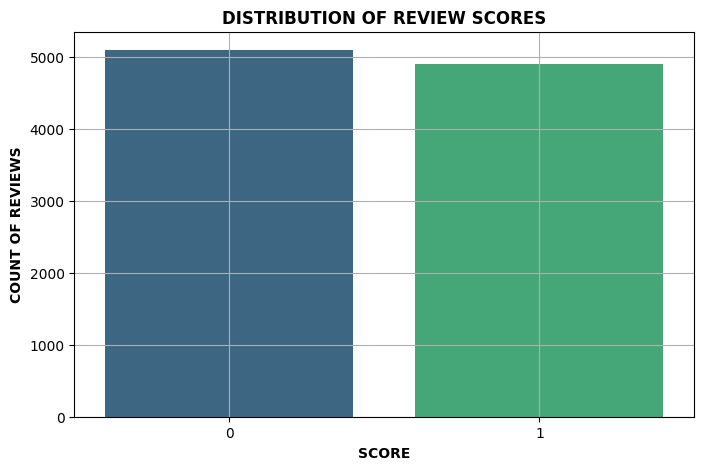

In [ ]:
plt.figure(figsize=(8,5))

sns.countplot(data=df,
              x='score',
              palette='viridis')

plt.title("DISTRIBUTION OF REVIEW SCORES", fontsize=12, weight = "bold")
plt.xlabel("SCORE", weight = "bold")
plt.ylabel("COUNT OF REVIEWS", weight = "bold")
plt.grid(True)
plt.show()

In [ ]:
#Checking for inconcisistencies
def errors(data):
  errors = ["\[.*?\]","https?:\S+|www\.\S+","<.*?>+","\\n","\\w*\\d\\w*"]
  for i in errors:
      if df[data].str.contains(i, regex = True).any():
          print(f"Exists: {i}")
      else:
          print(f"Doesn't exist: {i}")

errors("review")



Exists: \[.*?\]
Exists: https?:\S+|www\.\S+
Exists: <.*?>+
Exists: \n
Exists: \w*\d\w*


In [ ]:
#Cleaning Text
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')


lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

def data_cleaner(text):
    text = str(text).lower()
    text = re.sub('\\[.*?\\]', '', text)                          #Square brackets
    text = re.sub('https?:\\S+|www\\.\\S+', '', text)             #Links
    text = re.sub('<.*?>+', '', text)                             #HTML TAGS
    text = re.sub(f"[{re.escape(string.punctuation)}]", '', text) #Punctuation
    text = re.sub('\\n', '', text)                                #Newline Chars
    text = re.sub('\\w*\\d\\w*', '', text)                        #Removes digits
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopword]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    clean_text = " ".join(tokens)
    return clean_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df["Cleaned_Review"] = df["review"].astype(str).apply(data_cleaner)

In [ ]:
df[["review", "Cleaned_Review"]].head()

,review,Cleaned_Review
0,Stuning even for the non-gamer: This sound tr...,stuning even nongamer sound track beautiful pa...
1,The best soundtrack ever to anything.: I'm re...,best soundtrack ever anything im reading lot r...
2,Amazing!: This soundtrack is my favorite musi...,amazing soundtrack favorite music time hand in...
3,Excellent Soundtrack: I truly like this sound...,excellent soundtrack truly like soundtrack enj...
4,"Remember, Pull Your Jaw Off The Floor After H...",remember pull jaw floor hearing youve played g...


In [ ]:
df["Cleaned_Review_Length"] = df["Cleaned_Review"].apply(len)
df[["Cleaned_Review", "Cleaned_Review_Length"]].head()

,Cleaned_Review,Cleaned_Review_Length
0,stuning even nongamer sound track beautiful pa...,276
1,best soundtrack ever anything im reading lot r...,319
2,amazing soundtrack favorite music time hand in...,515
3,excellent soundtrack truly like soundtrack enj...,531
4,remember pull jaw floor hearing youve played g...,302


In [ ]:
!pip install textblob
from textblob import TextBlob

def review_sentiment_pol(text):
  pol = TextBlob(text).sentiment.polarity
  return pol

def review_sentiment_sub(text):
  sub = TextBlob(text).sentiment.subjectivity
  return sub

In [ ]:
df['sentiment_Polarity'] = df['Cleaned_Review'].apply(review_sentiment_pol)
df['sentiment_Subjectivity'] = df['Cleaned_Review'].apply(review_sentiment_sub)


In [ ]:
df[['Cleaned_Review', 'sentiment_Polarity', 'sentiment_Subjectivity']].head()

,Cleaned_Review,sentiment_Polarity,sentiment_Subjectivity
0,stuning even nongamer sound track beautiful pa...,-0.045000,0.480000
1,best soundtrack ever anything im reading lot r...,0.293750,0.457143
2,amazing soundtrack favorite music time hand in...,0.243382,0.572141
3,excellent soundtrack truly like soundtrack enj...,0.272727,0.509091
4,remember pull jaw floor hearing youve played g...,0.369841,0.546032


In [ ]:
text_sentiment = " ".join(df["Cleaned_Review"].astype(str))

In [ ]:
text_sentiment

'stuning even nongamer sound track beautiful paint senery mind well would recomend even people hate vid game music played game chrono cross game ever played best music back away crude keyboarding take fresher step grate guitar soulful orchestra would impress anyone care listen best soundtrack ever anything im reading lot review saying best game soundtrack figured id write review disagree bit opinino yasunori mitsudas ultimate masterpiece music timeless im listening year beauty simply refuse fadethe price tag pretty staggering must say going buy cd much money one feel would worth every penny amazing soundtrack favorite music time hand intense sadness prisoner fate mean youve played game hope distant promise girl stole star important inspiration personally throughout teen year higher energy track like chrono cross time scar time dreamwatch chronomantique indefinably remeniscent chrono trigger absolutely superb wellthis soundtrack amazing music probably best composer work havent heard xen

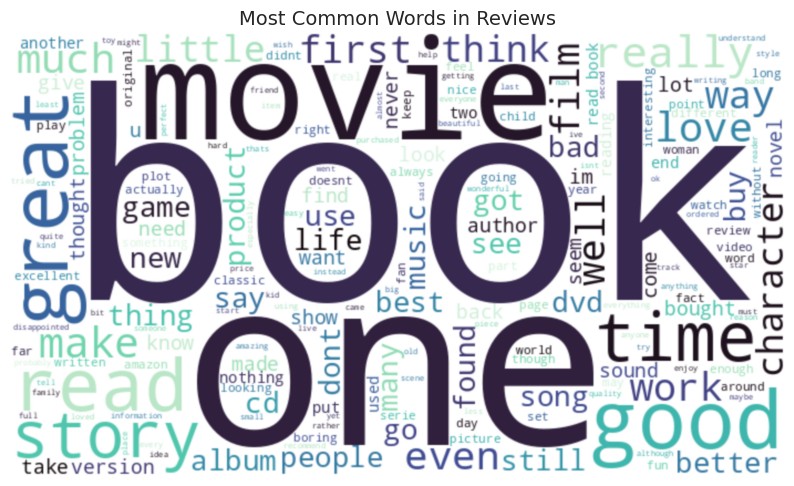

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(width=700,
                  height=400,
                  background_color="white",
                  colormap = "mako").generate(text_sentiment)

plt.figure(figsize=(10,10))
plt.imshow(cloud, interpolation='bicubic')
plt.axis("off")
plt.title("Most Common Words in Reviews", fontsize=14)
plt.show()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df[['Positive', 'Negative', 'Neutral']] = df['Cleaned_Review'].apply(lambda x: pd.Series(sia.polarity_scores(x))[['pos', 'neg', 'neu']])

In [ ]:
df[['Cleaned_Review', 'Positive', 'Negative', 'Neutral']].head()

,Cleaned_Review,Positive,Negative,Neutral
0,stuning even nongamer sound track beautiful pa...,0.338,0.118,0.544
1,best soundtrack ever anything im reading lot r...,0.318,0.071,0.610
2,amazing soundtrack favorite music time hand in...,0.439,0.076,0.484
3,excellent soundtrack truly like soundtrack enj...,0.398,0.123,0.479
4,remember pull jaw floor hearing youve played g...,0.396,0.000,0.604


In [ ]:
#Using CountVectorizer, where each column represents a word and values show its frequency.

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000)
vect.fit(df['Cleaned_Review'])
X = vect.transform(df['Cleaned_Review'])
df_array = X.toarray()
X_df = pd.DataFrame(df_array, columns=vect.get_feature_names_out())
X_df

,able,absolutely,account,across,act,acting,action,actor,actual,actually,...,written,wrong,wrote,year,yes,yet,youll,young,youre,youve
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordsums = X_df.sum().sort_values(ascending=False)
print(wordsums.head(20))

book      7543
one       4055
movie     3020
like      2888
read      2812
good      2774
great     2722
time      2407
would     2381
get       2220
dont      1771
story     1612
really    1605
make      1465
first     1444
work      1440
much      1419
even      1400
well      1371
love      1354
dtype: int64


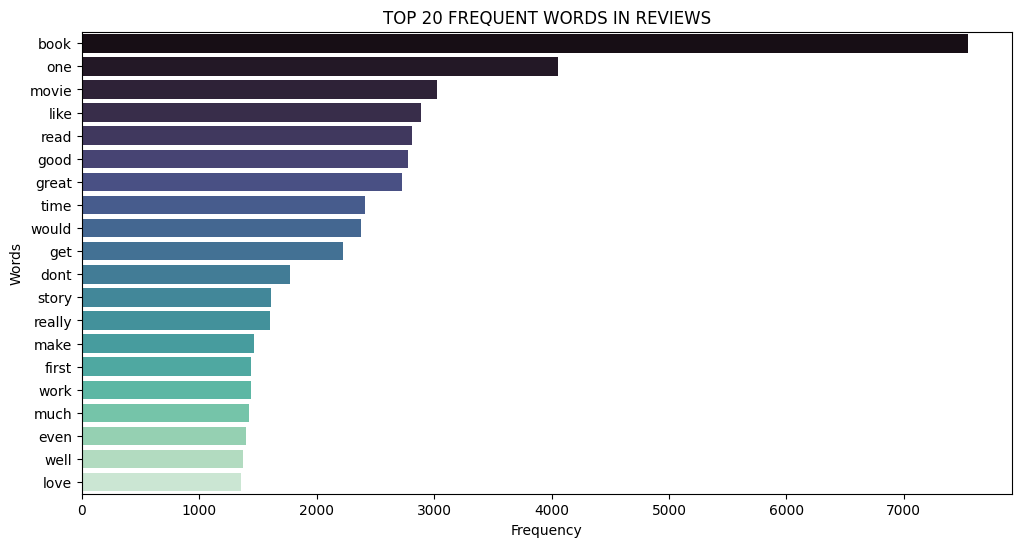

In [ ]:
import seaborn as  sns

plt.figure(figsize=(12,6))
sns.barplot(x=wordsums.head(20).values, y=wordsums.head(20).index, palette='mako')
plt.title('TOP 20 FREQUENT WORDS IN REVIEWS')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [ ]:
# Employing a pre-trained BERT-based model to analyze the sentiment of text.
from transformers import pipeline

sentiment_analyzer = pipeline("sentiment-analysis", device=0)

def bert_senti_analyzer(data):
  pred = sentiment_analyzer(data)[0]
  return pred

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [ ]:
df['Bert_sentiment'] = df['Cleaned_Review'].apply(bert_senti_analyzer)

In [ ]:
#Classify reviews into sentiment and subjectivity categories based on polarity and subjectivity scores.
def classify_polarity(score):
    if score > 0.3:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

def classify_subjectivity(score):
    if score > 0.7:
        return 'Subjective'
    elif score < 0.3:
        return 'Objective'
    else:
        return 'Mixed'
df['Polarity_Category'] = df['sentiment_Polarity'].apply(classify_polarity)
df['Subjectivity_Category'] = df['sentiment_Subjectivity'].apply(classify_subjectivity)

In [ ]:
df['Bert_score'] = df['Bert_sentiment'].apply(lambda x: x['score'])
df['Bert_label'] = df['Bert_sentiment'].apply(lambda x: x['label'])


In [ ]:
df.head()

,Unnamed: 0,score,review,Cleaned_Review,Cleaned_Review_Length,sentiment_Polarity,sentiment_Subjectivity,Positive,Negative,Neutral,Bert_sentiment,Polarity_Category,Subjectivity_Category,Bert_score,Bert_label
0,0,1,Stuning even for the non-gamer: This sound tr...,stuning even nongamer sound track beautiful pa...,276,-0.045000,0.480000,0.338,0.118,0.544,"{'label': 'POSITIVE', 'score': 0.6898342370986...",Neutral,Mixed,0.689834,POSITIVE
1,1,1,The best soundtrack ever to anything.: I'm re...,best soundtrack ever anything im reading lot r...,319,0.293750,0.457143,0.318,0.071,0.610,"{'label': 'POSITIVE', 'score': 0.9951543807983...",Neutral,Mixed,0.995154,POSITIVE
2,2,1,Amazing!: This soundtrack is my favorite musi...,amazing soundtrack favorite music time hand in...,515,0.243382,0.572141,0.439,0.076,0.484,"{'label': 'POSITIVE', 'score': 0.9996082186698...",Neutral,Mixed,0.999608,POSITIVE
3,3,1,Excellent Soundtrack: I truly like this sound...,excellent soundtrack truly like soundtrack enj...,531,0.272727,0.509091,0.398,0.123,0.479,"{'label': 'POSITIVE', 'score': 0.9985697269439...",Neutral,Mixed,0.998570,POSITIVE
4,4,1,"Remember, Pull Your Jaw Off The Floor After H...",remember pull jaw floor hearing youve played g...,302,0.369841,0.546032,0.396,0.000,0.604,"{'label': 'POSITIVE', 'score': 0.9977686405181...",Positive,Mixed,0.997769,POSITIVE


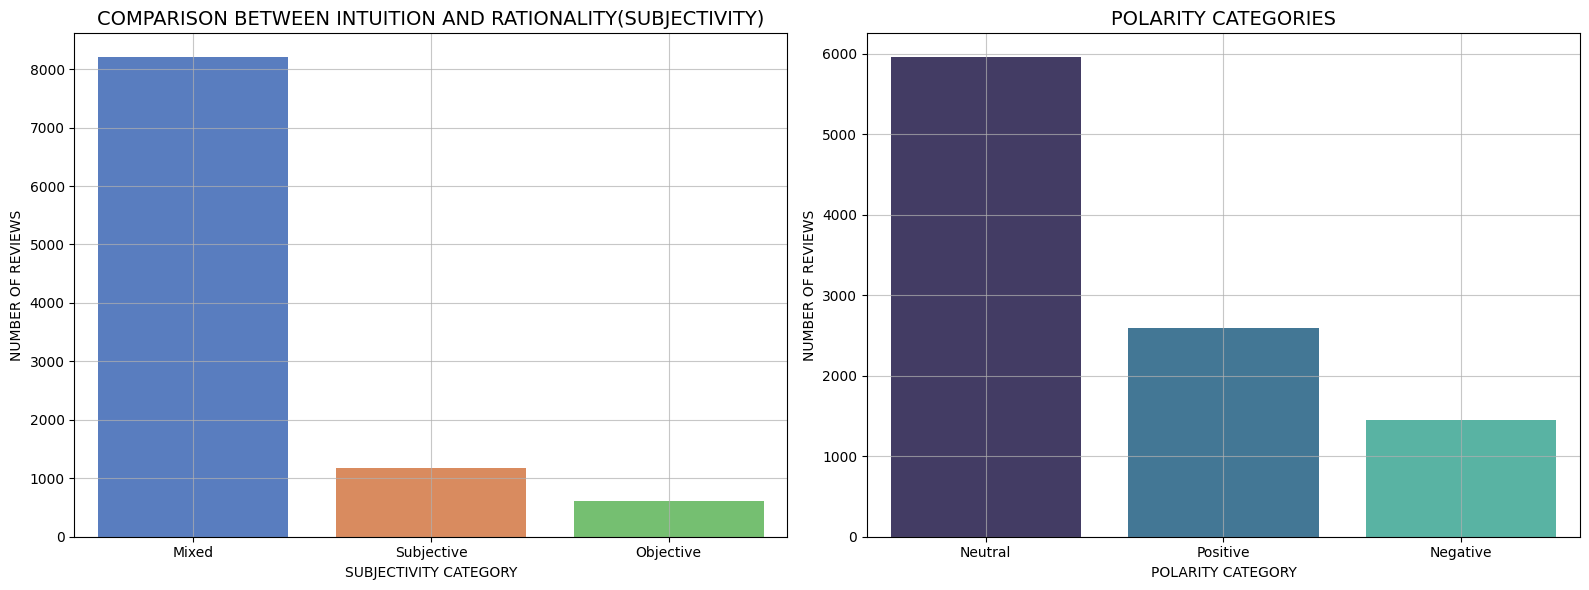

Polarity_Category
Neutral     0.5958
Positive    0.2595
Negative    0.1447
Name: proportion, dtype: float64
Subjectivity_Category
Mixed         0.8202
Subjective    0.1182
Objective     0.0616
Name: proportion, dtype: float64


In [ ]:
#Visualizing and compare the distribution of subjectivity and polarity categories
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.countplot(ax=axes[0], data=df, x='Subjectivity_Category', palette='muted')
axes[0].set_title("COMPARISON BETWEEN INTUITION AND RATIONALITY(SUBJECTIVITY)", fontsize=14)
axes[0].set_xlabel("SUBJECTIVITY CATEGORY")
axes[0].set_ylabel("NUMBER OF REVIEWS")
axes[0].grid(alpha=0.7)

sns.countplot(ax=axes[1], data=df, x='Polarity_Category', palette='mako')
axes[1].set_title("POLARITY CATEGORIES", fontsize=14)
axes[1].set_xlabel("POLARITY CATEGORY")
axes[1].set_ylabel("NUMBER OF REVIEWS")
axes[1].grid(alpha=0.7)

plt.tight_layout()
plt.show()

print(df['Polarity_Category'].value_counts(normalize=True))
print(df["Subjectivity_Category"].value_counts(normalize=True))

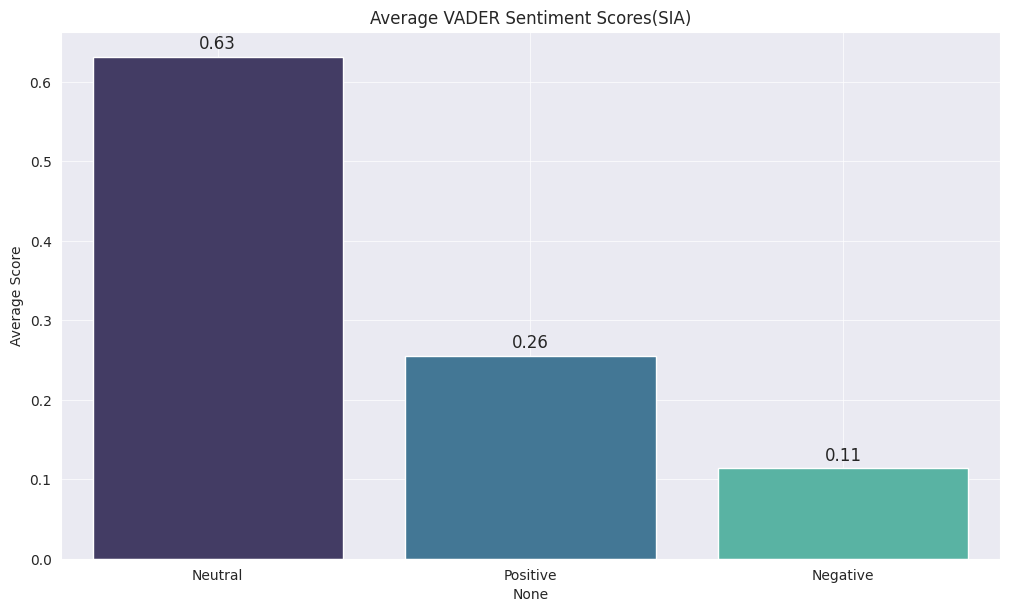

In [ ]:
#Visualizing the average VADER sentiment scores for Neutral, Positive, and Negative reviews.
sns.set_style("darkgrid")
average = df[['Neutral',"Positive",'Negative']].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=average.index, y=average.values, palette='mako')

for i, value in enumerate(average.values):
    plt.text(i, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)
plt.grid(alpha = 0.7)
plt.tight_layout()
plt.title("Average VADER Sentiment Scores(SIA)")
plt.ylabel("Average Score")


plt.show()

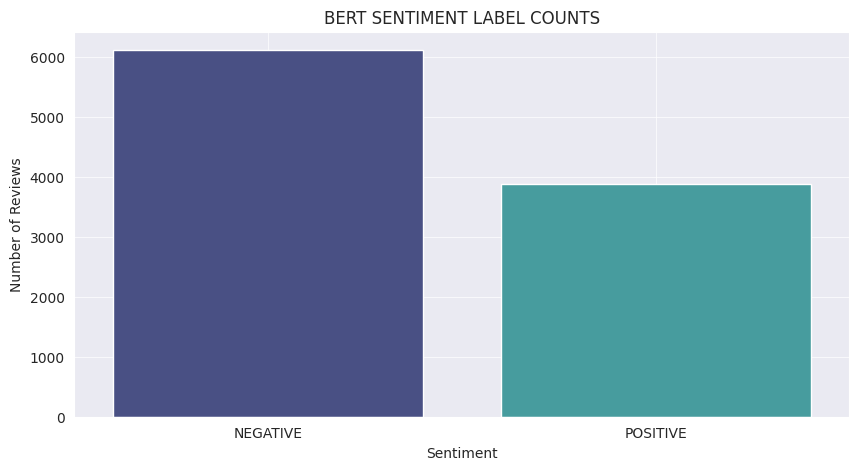

In [ ]:
#We are utilizing BERT because Vader and TextBlob cannot understand sarcasm, which can be conceived as neutral or mixed. Therefore, we employ BERT.
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))


counts = df['Bert_label'].value_counts()
sns.countplot(data=df, x='Bert_label', order=counts.index, palette='mako')
plt.title("BERT SENTIMENT LABEL COUNTS")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(alpha = 0.7)
plt.show()